In [1]:
import pandas as pd
import sklearn as sl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Data Analyst Projects/Week 3/raw_sales_data.xlsx'
df = pd.read_excel(file_path)
df

,Customer_ID,Customer_Name,Region,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index,Churned
0,101,John Doe,North,5000,12,2000,1.2,No
1,102,Jane Smith,South,3000,8,1500,1.0,Yes
2,103,Sam Brown,East,4500,10,1800,1.1,No
3,104,Linda Johnson,West,2500,5,1000,0.9,Yes
4,105,Michael Lee,North,7000,15,2500,1.3,No
5,106,Emily Davis,South,3200,7,1400,1.0,Yes
6,107,David Wilson,East,5300,14,2300,1.2,No
7,108,Susan White,West,2900,6,1100,0.8,Yes
8,109,Chris Martin,North,6000,13,2200,1.2,No
9,110,Anna Taylor,South,3100,8,1350,0.9,Yes


In [4]:
# Finding if there is any missing values in the dataset
miss_val = df.isnull().sum()
miss_val

,0
Customer_ID,0
Customer_Name,0
Region,0
Total_Spend,0
Purchase_Frequency,0
Marketing_Spend,0
Seasonality_Index,0
Churned,0


In [5]:
#To find the outliers
from scipy import stats
num_cols = ["Total_Spend", "Purchase_Frequency", "Marketing_Spend"]
z_scores = np.abs(stats.zscore(df[num_cols]))
print(z_scores)
outlier_rows = (z_scores > 3).any(axis=1)
outliers_zscore = df[outlier_rows]

print("Outliers detected using Z-Score Method:")
print(outliers_zscore)

    Total_Spend  Purchase_Frequency  Marketing_Spend
0      0.638042            0.800641         0.692902
1      0.841475            0.480384         0.373101
2      0.268162            0.160128         0.266501
3      1.211354            1.441153         1.439105
4      2.117558            1.761410         1.758906
5      0.693523            0.800641         0.586302
6      0.859969            1.441153         1.332504
7      0.915451            1.120897         1.225904
8      1.377800            1.120897         1.119304
9      0.767499            0.480384         0.692902
10     0.416114            0.480384         0.479702
11     1.137378            1.441153         1.332504
12     1.007921            0.800641         0.906103
13     0.619548            0.160128         0.479702
14     0.564066            0.480384         0.692902
15     1.063403            1.120897         1.119304
Outliers detected using Z-Score Method:
Empty DataFrame
Columns: [Customer_ID, Customer_Name, Regio

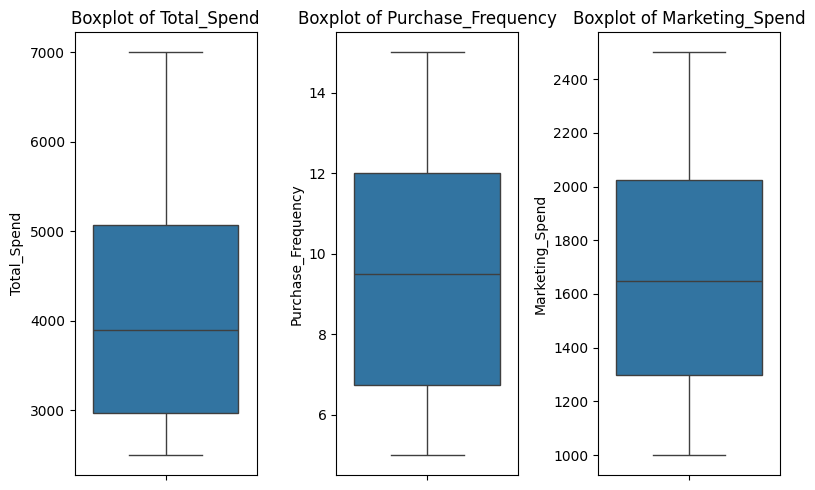

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
# Boxplots for numerical columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [7]:
region_category = pd.DataFrame({'Region':['North','South','East','West']})
churned_category = pd.DataFrame({'Churned':['Yes','No']})
print(region_category)
print(churned_category)

  Region
0  North
1  South
2   East
3   West
  Churned
0     Yes
1      No


In [8]:
from sklearn.preprocessing import LabelEncoder
correct_region_category = set(df['Region'].unique())
correct_churned_category = set(df['Churned'].unique())
wrong_region_category = correct_region_category.difference(region_category['Region'])
print(wrong_region_category)
wrong_churned_category = correct_churned_category.difference(churned_category['Churned'])
print(wrong_churned_category)

set()
set()


In [9]:
#Apply Linear Regression to predict sales based on marketing spend and seasonality.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['Marketing_Spend','Seasonality_Index']]
y = df['Total_Spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
sample = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(sample)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Feature Importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

    Actual    Predicted
0     5000  5171.140831
1     3000  3748.001934
5     3200  3494.924267
14    4900  5092.265549
Intercept: -836.9158878504659
Coefficients: [  2.53077667 788.75281985]
             Feature  Coefficient
0    Marketing_Spend     2.530777
1  Seasonality_Index   788.752820


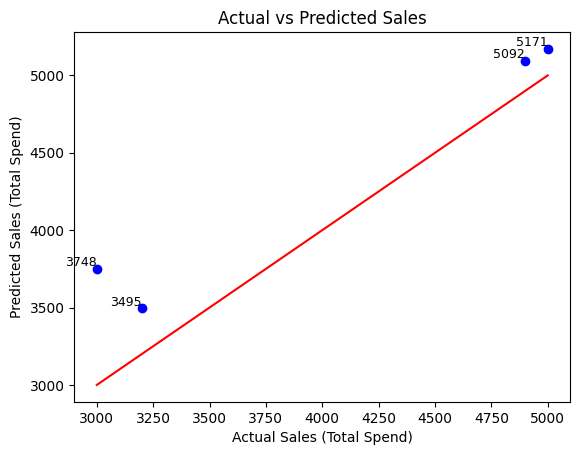

In [10]:
plt.scatter(y_test, y_pred, color='blue')
for actual, predicted in zip(y_test, y_pred):
    plt.text(actual, predicted, f'{predicted:.0f}', fontsize=9, ha='right', va='bottom')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel("Actual Sales (Total Spend)")
plt.ylabel("Predicted Sales (Total Spend)")
plt.title("Actual vs Predicted Sales")
plt.show()

In [ ]:
print(df['Churned'].isnull().sum())

0


In [ ]:
#Implement Logistic Regression to classify whether a customer will churn based on historical data.
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df['Churned'] = df['Churned'].map({'Yes': 1, 'No': 0})
X = df[['Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency']]
y = df['Churned']

if y.isnull().sum() > 0:
    y = y.fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify = y)

print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())
#print(f"Training Samples:{X_train.shape[0]}, Testing Samples:{X_test.shape[0]}")
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred))


Training Samples:12, Testing Samples:4


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

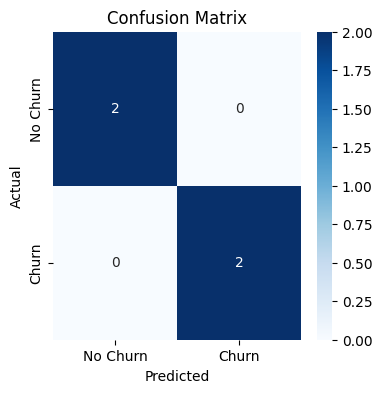

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

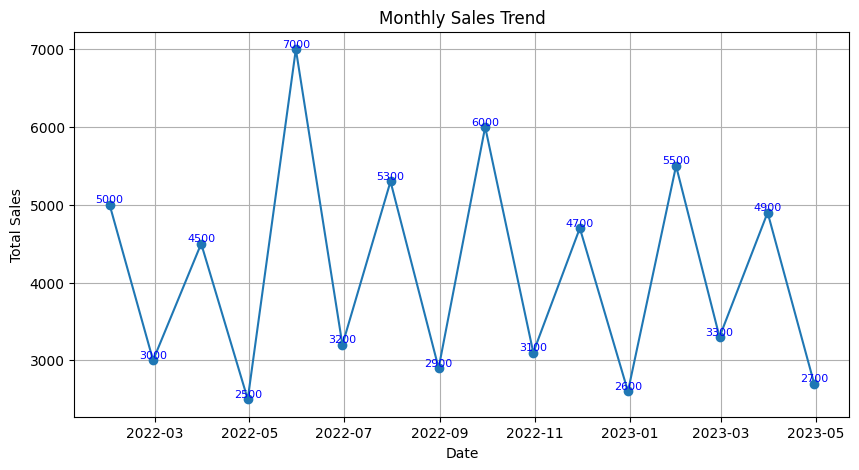

In [ ]:
#Use Time Series Forecasting (ARIMA/Prophet) to predict future monthly sales.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

date_range = pd.date_range(start="2022-01-01", periods=16, freq="M")  # Monthly data
sales_data = {
    'Date': date_range,
    'Total_Spend': [5000, 3000, 4500, 2500, 7000, 3200, 5300, 2900,
                    6000, 3100, 4700, 2600, 5500, 3300, 4900, 2700]
}

df = pd.DataFrame(sales_data)
df.set_index('Date', inplace=True)

# Plot the sales trend
plt.figure(figsize=(10,5))
plt.plot(df, marker='o', linestyle='-')
for date, value in zip(df.index, df['Total_Spend']):
    plt.text(date, value, f'{value}', ha='center', va='bottom', fontsize=8, color='blue')

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid()
plt.show()

In [ ]:
# Function to perform Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

# Check stationarity
check_stationarity(df['Total_Spend'])


ADF Statistic: -1.6819837737885999
p-value: 0.4404180645324191
The series is NOT stationary.


ADF Statistic: -1.1311894355430518
p-value: 0.7024750460478337
The series is NOT stationary.


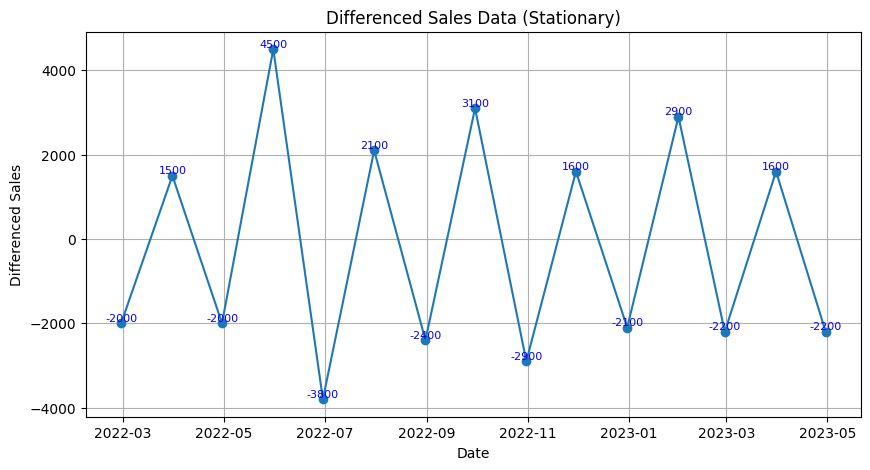

In [ ]:
df_diff = df.diff().dropna()  # First-order differencing
check_stationarity(df_diff['Total_Spend'])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(df_diff, marker='o', linestyle='-')
for date, value in zip(df_diff.index, df_diff['Total_Spend']):
    plt.text(date, value, f'{value:.0f}', ha='center', va='bottom', fontsize=8, color='blue')

plt.xlabel("Date")
plt.ylabel("Differenced Sales")
plt.title("Differenced Sales Data (Stationary)")
plt.grid()
plt.show()


In [ ]:
# Fit ARIMA model
model = ARIMA(df['Total_Spend'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            Total_Spend   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -123.279
Date:                Thu, 20 Feb 2025   AIC                            252.558
Time:                        15:53:04   BIC                            254.682
Sample:                    01-31-2022   HQIC                           252.535
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9971      0.019    -52.084      0.000      -1.035      -0.960
ma.L1          0.8944      0.393      2.276      0.023       0.124       1.665
sigma2      7.481e+05   3.46e-07   2.16e+12      0.0

            Predicted_Sales
Date                       
2023-05-31      5037.236049
2023-06-30      2706.788786
2023-07-31      5030.466982
2023-08-31      2713.538192
2023-09-30      5023.737181
2023-10-31      2720.248446


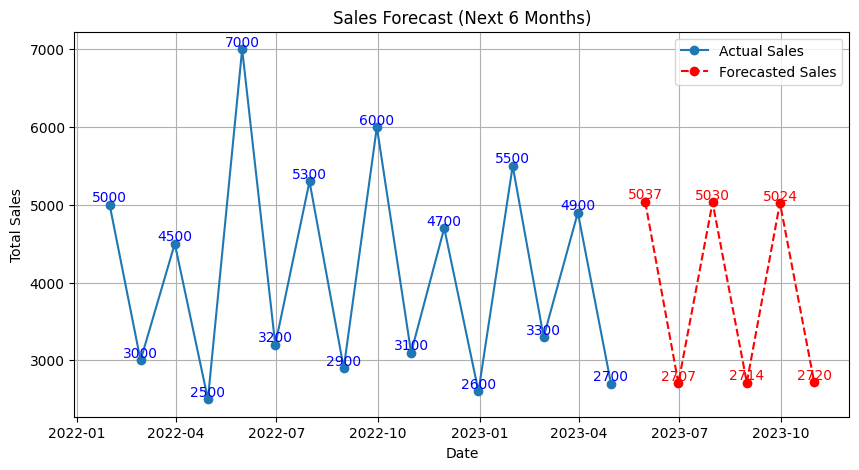

In [ ]:
# Forecast for next 6 months
future_steps = 6
forecast = model_fit.forecast(steps=future_steps)

# Create future dates
future_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='M')[1:]

# Create a forecast DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Sales': forecast})
forecast_df.set_index('Date', inplace=True)
print(forecast_df)
# Plot original + forecasted sales
plt.figure(figsize=(10, 5))
plt.plot(df, label="Actual Sales", marker='o')
plt.plot(forecast_df, label="Forecasted Sales", marker='o', linestyle='dashed', color='red')
for date, value in zip(df.index, df['Total_Spend']):
    plt.text(date, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10, color='blue')

for date, value in zip(forecast_df.index, forecast_df['Predicted_Sales']):
  plt.text(date, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10, color='red')


plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Forecast (Next 6 Months)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#ANOVA To compare sales performance across different regions.
from scipy.stats import f_oneway
# Group sales by region
north = df[df['Region'] == 'North']['Total_Spend']
south = df[df['Region'] == 'South']['Total_Spend']
east = df[df['Region'] == 'East']['Total_Spend']
west = df[df['Region'] == 'West']['Total_Spend']

# Perform ANOVA
f_stat, p_value = f_oneway(north, south, east, west)

# Display results
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("There is significant sales difference across each region!")
else:
    print("There is No significant difference in sales across regions!")



F-Statistic: 39.72
P-Value: 0.0000
There is significant sales difference across each region!


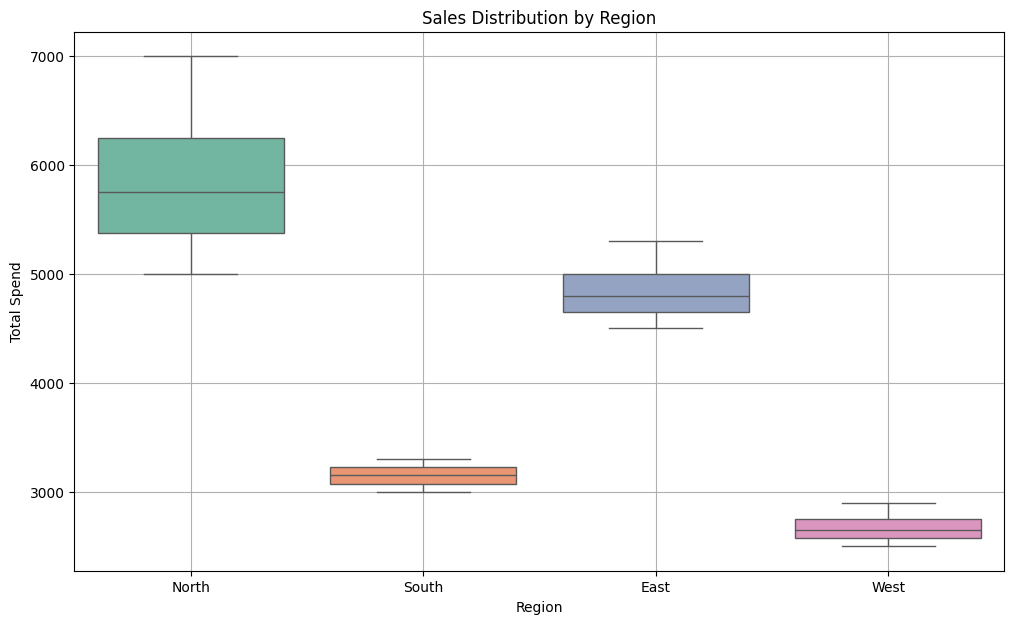

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Region', y='Total_Spend', data=df, palette='Set2')

# Add labels and title
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson's Correlation
correlation, p_value = pearsonr(df['Marketing_Spend'], df['Total_Spend'])

# Print the results
print(f"Correlation: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion based on the p-value
if p_value < 0.05:
    print("There is a significant correlation between Marketing Spend and Total Spend.")
else:
    print("There is no significant correlation between Marketing Spend and Total Spend.")


Correlation: 0.9719
P-Value: 0.0000
There is a significant correlation between Marketing Spend and Total Spend.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

# Assuming df is your dataset

# Step 1: Select relevant columns for Factor Analysis
features = ['Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency', 'Total_Spend']
X = df[features]

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform Factor Analysis (let's assume 2 factors for simplicity)
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
factors = factor_analysis.fit_transform(X_scaled)

# Step 4: Review the factor loadings
factor_loadings = pd.DataFrame(factor_analysis.components_, columns=features)
print("Factor Loadings:\n", factor_loadings)

# Step 5: Analyze the loadings to interpret the factors
# Higher loadings indicate a stronger relationship with the factor


Factor Loadings:
    Marketing_Spend  Seasonality_Index  Purchase_Frequency  Total_Spend
0         0.998248           0.967166            0.992566     0.972406
1        -0.013650          -0.068743            0.065701    -0.054165


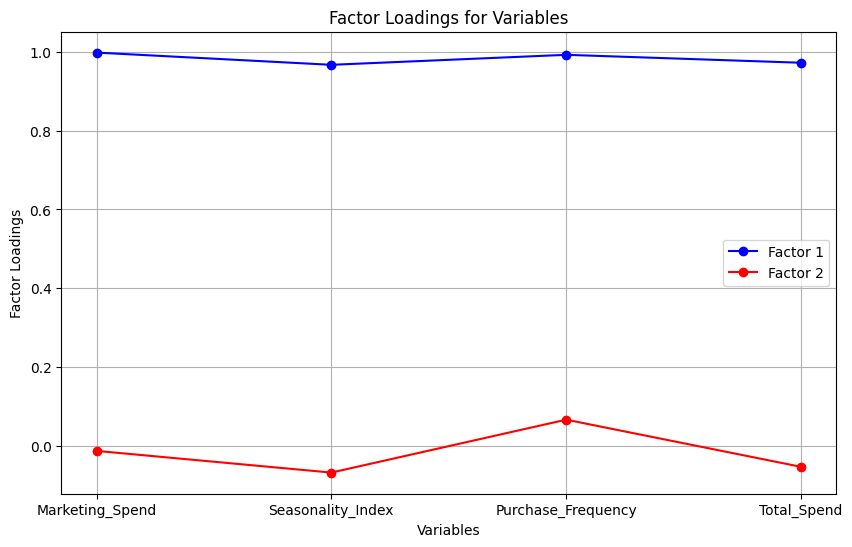

In [ ]:
import matplotlib.pyplot as plt

# Plotting the factors
#plt.figure(figsize=(8, 6))
#plt.scatter(factors[:, 0], factors[:, 1])
#plt.title("Factor Analysis: Factors 1 and 2")
#plt.xlabel("Factor 1")
#plt.ylabel("Factor 2")
#plt.grid(True)
#plt.show()
plt.figure(figsize=(10, 6))

# Line plot for Factor 1 and Factor 2 loadings
plt.plot(features, factor_loadings.iloc[0], label='Factor 1', marker='o', linestyle='-', color='b')
plt.plot(features, factor_loadings.iloc[1], label='Factor 2', marker='o', linestyle='-', color='r')

# Adding labels and title
plt.title('Factor Loadings for Variables')
plt.xlabel('Variables')
plt.ylabel('Factor Loadings')
plt.grid(True)
plt.legend()

# Show plot
plt.show()



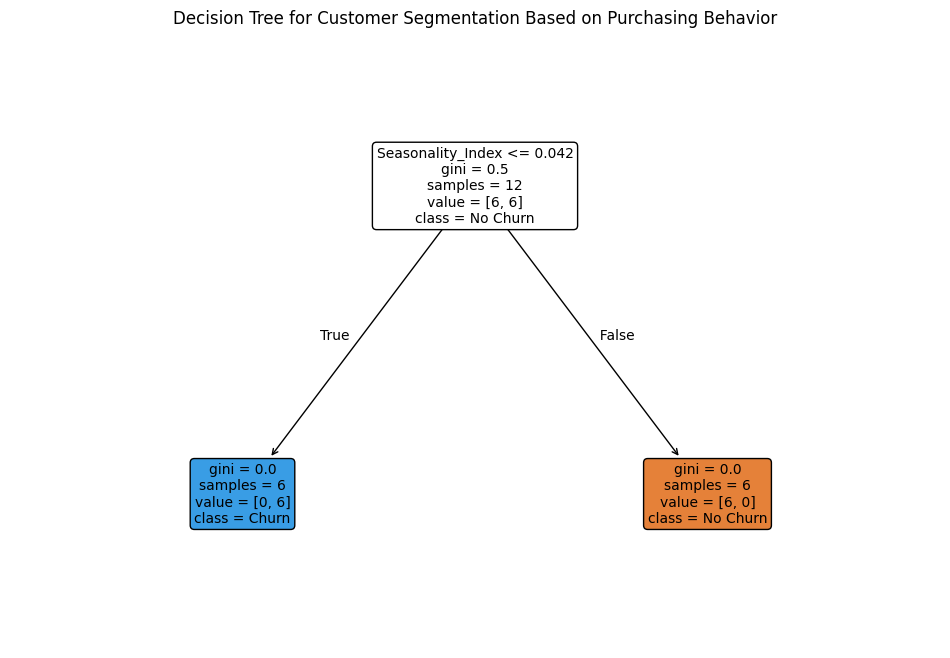

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree

df['Churned'] = df['Churned'].map({'Yes': 1, 'No': 0})

# Features for segmentation (independent variables)
X = df[['Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency']]

# Target variable for segmentation
y = df['Churned']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=['Marketing_Spend', 'Seasonality_Index', 'Purchase_Frequency'],
               class_names=['No Churn', 'Churn'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Customer Segmentation Based on Purchasing Behavior')
plt.show()



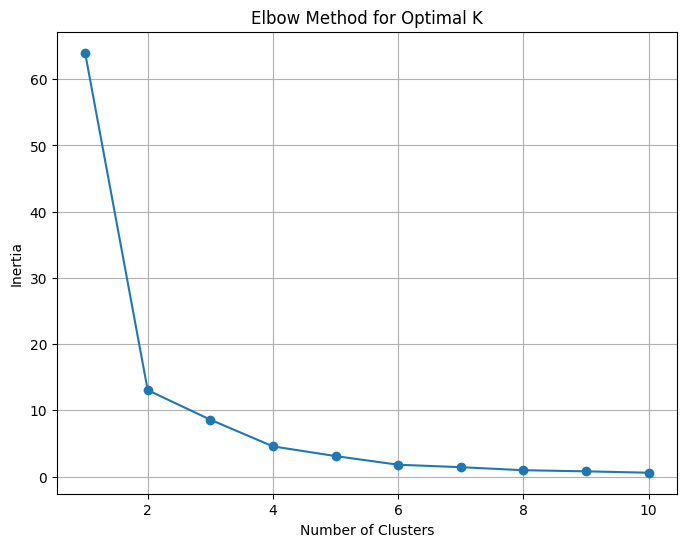

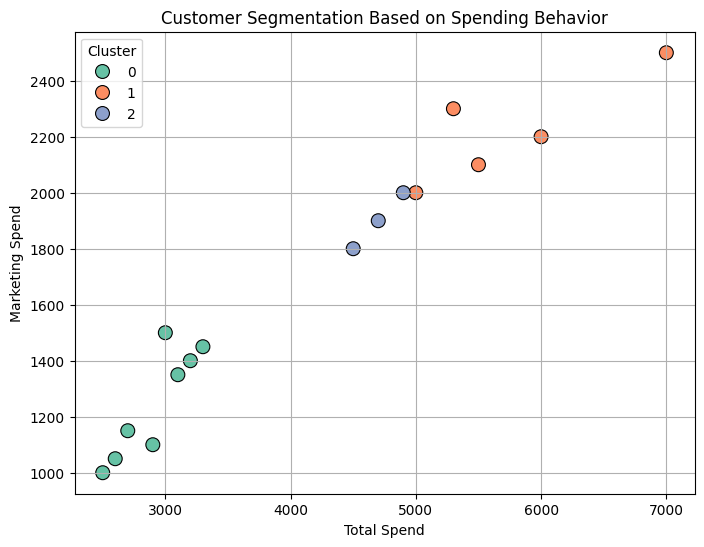

Cluster Centers (in original scale):
   Total_Spend  Marketing_Spend  Purchase_Frequency  Seasonality_Index
0       2912.5           1250.0            6.750000             0.9125
1       5760.0           2220.0           13.200000             1.2200
2       4700.0           1900.0           10.666667             1.1000


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Selecting the features for clustering
X = df[['Total_Spend', 'Marketing_Spend', 'Purchase_Frequency', 'Seasonality_Index']]

# Scaling the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the Elbow Method to determine the optimal number of clusters (K)
inertia = []
K_range = range(1, 11)  # Trying different K values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# From the Elbow graph, choose the best K (say, K=3 for this example)

# Fit the K-Means model with the chosen number of clusters (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (2D scatter plot based on 2 features)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total_Spend', y='Marketing_Spend', hue='Cluster', palette='Set2', s=100, edgecolor='black')
plt.title('Customer Segmentation Based on Spending Behavior')
plt.xlabel('Total Spend')
plt.ylabel('Marketing Spend')
plt.grid(True)
plt.show()

# If you'd like to explore the cluster centers:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Reverse scaling for interpretability
print("Cluster Centers (in original scale):")
print(pd.DataFrame(cluster_centers, columns=['Total_Spend', 'Marketing_Spend', 'Purchase_Frequency', 'Seasonality_Index']))


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

warnings.filterwarnings("ignore")

# Sample data
sales_data = {
    'Customer_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116],
    'Customer_Name': ['John Doe', 'Jane Smith', 'Sam Brown', 'Linda Johnson', 'Michael Lee', 'Emily Davis', 'David Wilson', 'Susan White', 'Chris Martin', 'Anna Taylor', 'James Anderson', 'Patricia Thomas', 'Robert Jackson', 'Mary Harris', 'Daniel Clark', 'Barbara Lewis'],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
    'Total_Spend': [5000, 3000, 4500, 2500, 7000, 3200, 5300, 2900, 6000, 3100, 4700, 2600, 5500, 3300, 4900, 2700],
    'Purchase_Frequency': [12, 8, 10, 5, 15, 7, 14, 6, 13, 8, 11, 5, 12, 9, 11, 6],
    'Marketing_Spend': [2000, 1500, 1800, 1000, 2500, 1400, 2300, 1100, 2200, 1350, 1900, 1050, 2100, 1450, 2000, 1150],
    'Seasonality_Index': [1.2, 1.0, 1.1, 0.9, 1.3, 1.0, 1.2, 0.8, 1.2, 0.9, 1.1, 0.8, 1.2, 1.0, 1.1, 0.9],
    'Churned': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(sales_data)

# Label Encoding for target variable if it's classification
df['Churned'] = df['Churned'].map({'Yes': 1, 'No': 0})  # Binary target variable

# Features (input variables) and target (output variable)
X = df[['Total_Spend', 'Marketing_Spend', 'Purchase_Frequency', 'Seasonality_Index']]
y = df['Churned']  # Assuming we want to predict whether a customer will churn or not

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Random Forest Model (Classification for Churn Prediction)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. XGBoost Model (Classification for Churn Prediction)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict using Random Forest
rf_predictions = rf_model.predict(X_test)

# Predict using XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the performance of both models
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Print Accuracy Results
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

# Confusion Matrix (Random Forest)
print("\nRandom Forest Confusion Matrix:")
print(pd.crosstab(y_test, rf_predictions, rownames=['Actual'], colnames=['Predicted']))

# Confusion Matrix (XGBoost)
print("\nXGBoost Confusion Matrix:")
print(pd.crosstab(y_test, xgb_predictions, rownames=['Actual'], colnames=['Predicted']))

# Classification report
from sklearn.metrics import classification_report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


Random Forest Accuracy: 1.00
XGBoost Accuracy: 1.00

Random Forest Confusion Matrix:
Predicted  0  1
Actual         
0          2  0
1          0  2

XGBoost Confusion Matrix:
Predicted  0  1
Actual         
0          2  0
1          0  2

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

